# Landing.Jobs Data Challenge #Data4Tech

### Analyzing data from Tech Careers Report (Landing.jobs' survey 2021)

The main goal of this notebook is to analyze data from Landing.Jobs' survey 2021 by taking advantage of Statistics tools, Machine Learning and Data Visualization. 

In this notebook we are going to mainly apply both Statistic and Machine Learning tools. There are two sessions available bellow:

1. The first one is focused on **Statistical analysis** in order to answer questions as "Is there correlation between this two variables?";

2. The second session is focused on **Machine Learning**, in which is applied K-Means Algorithm and Association Rules Algorithm. K-Means Algorithm helps us to understand whether number of languages you know has correlation with your salary or not, while Association Rules tries to figure out what language are learned together by the participants.

For **Data Visualization**, in this project we have worked on Microsoft PowerBI, creating a report that brings to us great results and insights about the survey's participants and the Tech world. In order to access this project fully, please access my Github: https://github.com/isabelmarcolino/Data4Tech_Challenge.

# Statistical Analysis

Statistical analysis help us to understand better our data, uncovering patterns and trends. In this session we are going to apply mainly Pearson's correlation coeficient and Boxplot Graphic. 






### 1. Correlation Analysis

**Pearson's correlation coefficient** is the test statistics that measures the statistical relationship or association, between two continuous variables. It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance. In order to understand better our results, correlation coeficient is in the range from -1 to 1: negative coeficients show that there is a negative correlation (when one increases, the other one decreases); positive coeficients indicate that there is a positive correlation (both increase or decrease together); when the coeficient is 0, it means that there is not a linear correlation. 

<img src="https://brianwhitworth.com/wp-content/uploads/2018/10/positive-negative-corrrelation.jpg" width="400">

In [1]:
#Importing the main libraries that will be used
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Read the dataset
df = pd.read_excel('Filtered_Dataset.xlsx')

df.head()

,Avg_Salary,Gender,English_Level,Working_Experience,Job_Role,Employer_Org_Type,Salary_Fairness,Changing_Jobs_next_6_months,Age,Residence_District,Work_Company_Country,Remote_Working_Current,Work_Company_Continent,Employer_Industry,Remote_Work_Opinion,Employer_Size,Education_Level,Remote_Working_due_to_Covid
0,32500,Male,Full professional proficiency,More than 9 years,Technical Team Leader,Corporate,4,4.0,37.0,Santarém,Portugal,"Yes, fully remote",Europe,Financial and banking,6.0,1000 - 4.999 employees,NaN,Working remote because of Covid-19
1,12500,Male,Full professional proficiency,More than 9 years,Full-Stack Developer,SME - Small or Medium Enterprise (personnel <250),4,3.0,45.0,Coimbra,Portugal,"Yes, fully remote",Europe,Software development - other,7.0,Less than 10 employees,NaN,Working remote because of Covid-19
2,16000,Male,Full professional proficiency,Between 1 - 3 years,Full-Stack Developer,Startup (new business venture),3,5.0,35.0,Porto,No specific country,"Yes, fully remote",NaN,Web development or design,4.0,Less than 10 employees,Bachelor degree,Working remote because of Covid-19
3,17500,Male,Full professional proficiency,More than 9 years,Product Owner/Product Manager,SME - Small or Medium Enterprise (personnel <250),4,3.0,46.0,Açores,Portugal,"Yes, fully remote",Europe,Web development or design,5.0,100 - 499 employees,Bachelor degree,Working remote because of Covid-19
4,17500,Male,Professional working proficiency,Between 6 - 9 years,Back-End Developer,SME - Small or Medium Enterprise (personnel <250),5,2.0,32.0,Braga,Portugal,"Yes, fully remote",Europe,Software development - other,5.0,10 - 19 employees,Bachelor degree,My job is remote (full or flexible) by definition


In [2]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Transforming categorial data into numerical data 
#(columns Remote_Working_Current, Working_Experience and Education_Level)

import category_encoders as ce

encoder= ce.OrdinalEncoder(cols=['Remote_Working_Current'],
                           return_df=True,mapping=[{'col':'Remote_Working_Current',
                                                    'mapping':{'Yes, fully remote':2,'Flexible between remote and office':1,
                                                               'No, full office job':0}}])
transformed = encoder.fit_transform(df)

encoder= ce.OrdinalEncoder(cols=['Working_Experience'],return_df=True,mapping=[
    {'col':'Working_Experience','mapping':{'No working experience':0,'Less than 1 year':1,
                                           'Between 1 - 3 years':2, 'Between 3 - 6 years':3, 'Between 6 - 9 years':4, 
                                           'More than 9 years':5}}])
transformed = encoder.fit_transform(df)

encoder= ce.OrdinalEncoder(cols=['Education_Level'],return_df=True,
                           mapping=[{'col':'Education_Level','mapping':{'':0,'I prefer not to answer':0,
                                    'Basic Education':1, 'Trade/technical/vocational training':2,'High School Education':3, 
                                    'University drop out':4, 'Bachelor degree': 5, 'Masters degree':6, 'Doctoral degree':7}}])

transformed = encoder.fit_transform(transformed)

encoder= ce.OrdinalEncoder(cols=['English_Level'],return_df=True,mapping=[
    {'col':'English_Level','mapping':{'Elementary':0,'Limited working proficiency':1,'Professional working proficiency':2,
                                      'Full professional proficiency':3, 'Native or bilingual proficiency':4}}])
transformed = encoder.fit_transform(transformed)

transformed.head()

C:\Users\marco\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Avg_Salary,Gender,English_Level,Working_Experience,Job_Role,Employer_Org_Type,Salary_Fairness,Changing_Jobs_next_6_months,Age,Residence_District,Work_Company_Country,Remote_Working_Current,Work_Company_Continent,Employer_Industry,Remote_Work_Opinion,Employer_Size,Education_Level,Remote_Working_due_to_Covid
0,32500,Male,3,5,Technical Team Leader,Corporate,4,4.0,37.0,Santarém,Portugal,"Yes, fully remote",Europe,Financial and banking,6.0,1000 - 4.999 employees,-1.0,Working remote because of Covid-19
1,12500,Male,3,5,Full-Stack Developer,SME - Small or Medium Enterprise (personnel <250),4,3.0,45.0,Coimbra,Portugal,"Yes, fully remote",Europe,Software development - other,7.0,Less than 10 employees,-1.0,Working remote because of Covid-19
2,16000,Male,3,2,Full-Stack Developer,Startup (new business venture),3,5.0,35.0,Porto,No specific country,"Yes, fully remote",NaN,Web development or design,4.0,Less than 10 employees,5.0,Working remote because of Covid-19
3,17500,Male,3,5,Product Owner/Product Manager,SME - Small or Medium Enterprise (personnel <250),4,3.0,46.0,Açores,Portugal,"Yes, fully remote",Europe,Web development or design,5.0,100 - 499 employees,5.0,Working remote because of Covid-19
4,17500,Male,2,4,Back-End Developer,SME - Small or Medium Enterprise (personnel <250),5,2.0,32.0,Braga,Portugal,"Yes, fully remote",Europe,Software development - other,5.0,10 - 19 employees,5.0,My job is remote (full or flexible) by definition


<AxesSubplot:>

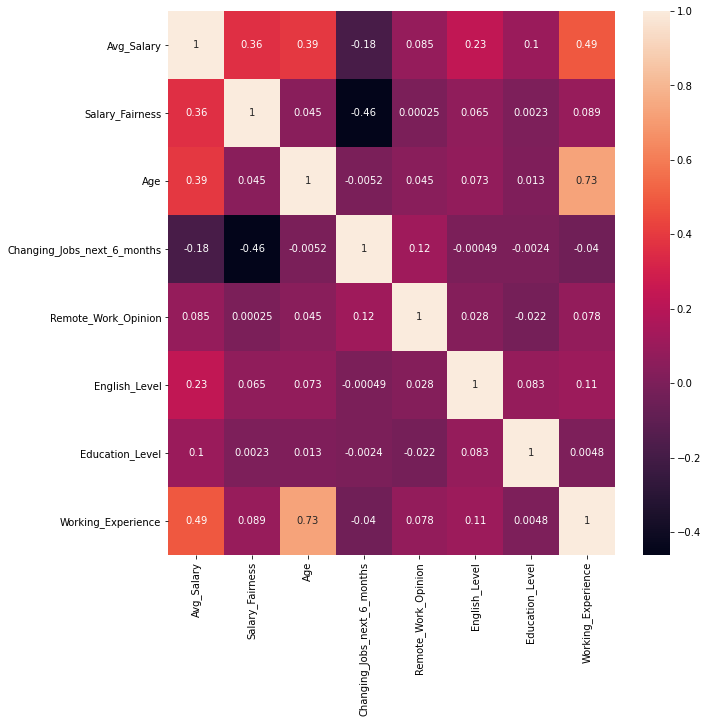

In [4]:
#Appling Pearson's Correlation Coeficient in our data.

columns = ["Avg_Salary", "Salary_Fairness", "Age", "Changing_Jobs_next_6_months", 
           "Remote_Work_Opinion", "Remote_Working_Current", "English_Level","Education_Level", "Working_Experience"]
df3 = transformed[columns]
corr2 = df3.corr(method = "pearson")

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr2, annot = True, ax = ax)

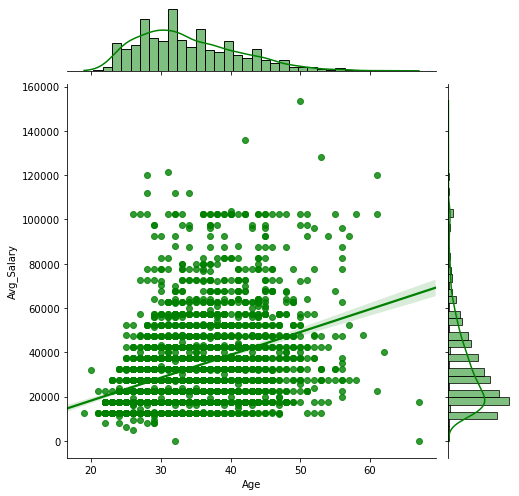

In [5]:
#Plotting Age x Salary

df2 = pd.read_excel('Filtered_Dataset.xlsx')
categories = ['Age','Avg_Salary']
dfAgeSalary = df2[categories]

sns.jointplot(x=dfAgeSalary['Age'], y=dfAgeSalary['Avg_Salary'], data=dfAgeSalary,
                  kind="reg", truncate=False,
                  color="g", height=7)

#### Main results of Pearson's Correlation Coeficient

 
1. Salary's average is positive correlationed with Working Experience, English Level, Age and Salary Fairness. It means that the variable Salary increases when you have more working experience, an English Level and an Age higher (this last one also shown on the last graphic in this session - linear regression). Also, the higher is your salary, more fairness it seens to the worker.


2. On the other hand, salary's average is negative correlationed with the variable Changing jobs next 6 months, which means that the higher is your salary, the less you intend to change jobs in the next six months.


3. Changing jobs next 6 months is even more correlated to Salary Fairness. As previously indicated, Salary Fairness is also positive relationed to Salary. 


4. Remote work opinion has a slightly positive correlation with changing job next 6 months. But checking the type of working (Remote_Working_Current category - full remote, flexible or full office) in more details, we can conclude that around 43% of people who work full time in office are more likely to change job next 6 months. However, people who always work remotly or flexible (regardless the Covid) correspond to 27%. For this analysis, we have selected people who have chosen levels 5 and 4 in the changing jobs next 6 months category. We can visualize it bellow and in the PowerBI report we have made, that is available in my Github (Remote Working x Changing Job tab). 
 
**Conclusion: 1. Companies that provide fairness salaries tend to keep their talents; 2. Workers who have flexibility to work remotely are less likely to change jobs next months.**



<img src="GraphPowerBI.PNG" width="600"/>



### 2. Boxplot Analysis

     
**Boxplot** is a way to display the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and also if your data is symmetrical and how tightly your data is grouped. 

<img src="https://miro.medium.com/max/961/0*q2_0X7rTtdNFT6Xi.jpg" width="400">

In [6]:
#Filtering data with only columns that will be used by next steps

categories = ['Employer_Org_Type','Salary_Fairness', "Changing_Jobs_next_6_months", "Remote_Work_Opinion"]
filtered = df2[categories]
filtered.head()

,Employer_Org_Type,Salary_Fairness,Changing_Jobs_next_6_months,Remote_Work_Opinion
0,Corporate,4,4.0,6.0
1,SME - Small or Medium Enterprise (personnel <250),4,3.0,7.0
2,Startup (new business venture),3,5.0,4.0
3,SME - Small or Medium Enterprise (personnel <250),4,3.0,5.0
4,SME - Small or Medium Enterprise (personnel <250),5,2.0,5.0


Text(0.5, 1.0, 'Changing jobs next 6 months x Remote work opinion')

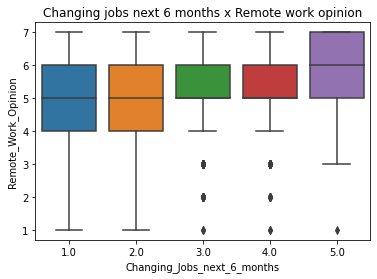

In [7]:
#Ploting type of changing jobs next 6 months x remote work opinion

fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(x = filtered["Changing_Jobs_next_6_months"], y = filtered["Remote_Work_Opinion"], 
            data=filtered, ax = ax).set_title('Changing jobs next 6 months x Remote work opinion')

Text(0.5, 1.0, 'Type of organization x Salary Fairness')

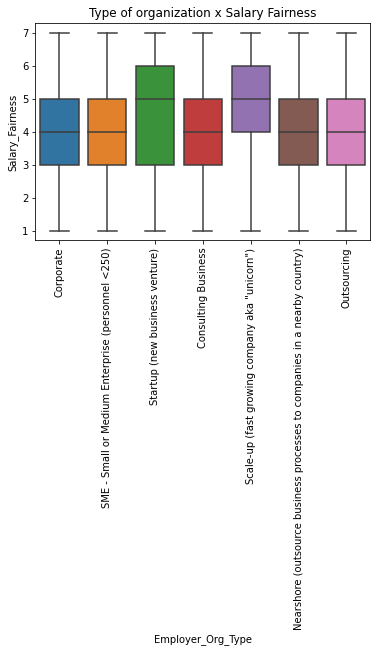

In [8]:
#Ploting type of organization x salary fairness

fig, ax = plt.subplots(figsize=(6,4))
plt.xticks(rotation=90)
sns.boxplot(x = filtered['Employer_Org_Type'], y = filtered['Salary_Fairness'], 
            data=filtered, ax = ax).set_title('Type of organization x Salary Fairness')


Text(0.5, 1.0, 'Type of organization x Changing jobs next 6 months')

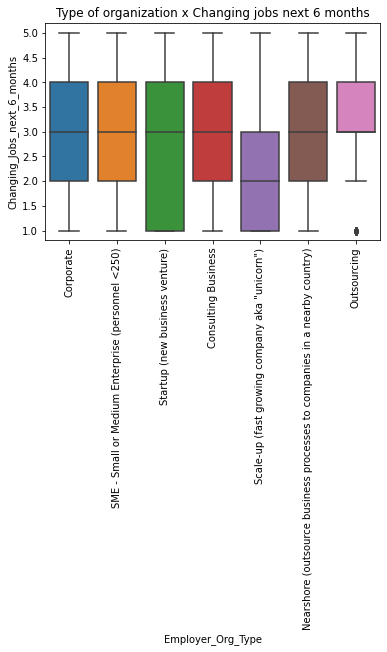

In [9]:
#Ploting type of organization x changing jobs next 6 months

fig, ax = plt.subplots(figsize=(6,4))
plt.xticks(rotation=90)
sns.boxplot(x = filtered["Employer_Org_Type"], y = filtered["Changing_Jobs_next_6_months"], 
            data=filtered, ax = ax).set_title('Type of organization x Changing jobs next 6 months')

In [10]:
categories = ['Avg_Salary',"Employer_Org_Type"]
dfAverage = df2[categories]
dfAverage = dfAverage.groupby('Employer_Org_Type').mean()
dfAverage.sort_values(by=['Avg_Salary'], ascending = False)

,Avg_Salary
Employer_Org_Type,
"Scale-up (fast growing company aka ""unicorn"")",40566.122449
Corporate,35742.661805
Startup (new business venture),33598.746082
Nearshore (outsource business processes to companies in a nearby country),30155.319149
Consulting Business,29705.714286
SME - Small or Medium Enterprise (personnel <250),29625.343811
Outsourcing,25306.875000


#### Main results of Boxplot Analysis

 
1. The first boxplot (Changing jobs next 6 months x Remote work opinion) presents other kind of view about what were discussed in the previuos session (correlation).


2. In the second one (Type of organization x Salary Fairness), we can see that workers from Unicorn and Startups present the higher median, which means that they scored theirs salary fairness higher than workers from other companies. It's interesting note that the category Unicorn has data less spreaded. When we analyse the third boxplot (Type of organization x Changing jobs next 6 months), workers from Unicorn companies present the smallest median. So, we are able to say that Unicorn companies' workers are less likely to changing jobs, and they feel fairness of theirs salaries. Important note that Scale-up has the highest average salary, as per the table above. 

**Conclusion: Unicorn companies tend to provide higher and fairness salaries.**




# K-Means Clustering

In this session we are going to verify whether the number of laguages you know has correlation with your salary or not. Here, we are applying K-Means algorithm for verifying if the number of languages that a person knows and his salary average is correlated (whether it forms cluster or not, by mean). For that, we are going to take advantage of K-Means Clustering - a Machine Learning method that allow us particing *n* observation in *k* groups, based on the avarage. K-Means algorithm identifies *k* number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

<img src="https://miro.medium.com/max/1200/1*rw8IUza1dbffBhiA4i0GNQ.png" width="400">

In [11]:
#Importing libraries that will be used and the dataset

from scipy import stats
from sklearn.cluster import KMeans
dataframe = pd.read_excel("Languages.xlsx")

dfLanguages2 = dataframe.iloc[:,1:36]
dfLanguages2.head()

,Language_JavaScript,Language_Bash/Shell/PowerShell,Language_SQL,Language_Java,Language_C#,Language_Python,Language_PHP,Language_C++,Language_C,Language_TypeScript,...,Language_Haskell,Language_HTML/CSS,Language_Kotlin,Language_Rust,Language_Elixir,Language_Clojure,Language_WebAssembly,Language_Dart,Language_Languages_N/A,Language_Languages_Other
0,NaN,NaN,SQL,Java,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JavaScript,NaN,SQL,NaN,NaN,NaN,PHP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JavaScript,NaN,SQL,Java,NaN,NaN,PHP,C++,NaN,NaN,...,NaN,HTML/CSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,C++,NaN,TypeScript,...,NaN,HTML/CSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JavaScript,NaN,SQL,Java,C#,NaN,NaN,C++,NaN,TypeScript,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dart,NaN,NaN


In [12]:
#Summarizing the number of languages each worker knows

dfLanguages2['Count_Languages'] = dfLanguages2.count(axis='columns')

dfLanguages2.head()

,Language_JavaScript,Language_Bash/Shell/PowerShell,Language_SQL,Language_Java,Language_C#,Language_Python,Language_PHP,Language_C++,Language_C,Language_TypeScript,...,Language_HTML/CSS,Language_Kotlin,Language_Rust,Language_Elixir,Language_Clojure,Language_WebAssembly,Language_Dart,Language_Languages_N/A,Language_Languages_Other,Count_Languages
0,NaN,NaN,SQL,Java,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,JavaScript,NaN,SQL,NaN,NaN,NaN,PHP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,JavaScript,NaN,SQL,Java,NaN,NaN,PHP,C++,NaN,NaN,...,HTML/CSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,C++,NaN,TypeScript,...,HTML/CSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,JavaScript,NaN,SQL,Java,C#,NaN,NaN,C++,NaN,TypeScript,...,NaN,NaN,NaN,NaN,NaN,NaN,Dart,NaN,NaN,9


In [13]:
#Appending the count collumn to a new dataframe, with the correspondent salary

dfSalary = dataframe.iloc[:,:1]
dfSalary['Count_Languages'] = dfLanguages2['Count_Languages']
dfSalary.head()

C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Avg_Salary,Count_Languages
0,32500,3
1,12500,3
2,16000,7
3,17500,4
4,17500,9


In [14]:
#Training and predicting the model, considering 3 clusters

km = KMeans(n_clusters = 3)
y_predict = km.fit_predict(dfSalary[['Count_Languages', "Avg_Salary"]])
dfSalary["cluster"] = y_predict
dfSalary.head(5)

C:\Users\marco\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Avg_Salary,Count_Languages,cluster
0,32500,3,0
1,12500,3,1
2,16000,7,1
3,17500,4,1
4,17500,9,1


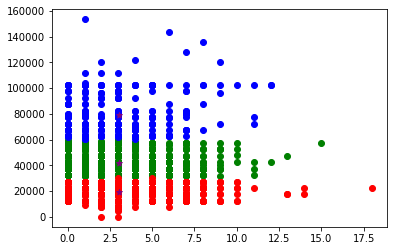

In [15]:
#Plotting the clusters and theirs centroids

dfCluster1 = dfSalary[dfSalary.cluster == 0]
dfCluster2 = dfSalary[dfSalary.cluster == 1]
dfCluster3 = dfSalary[dfSalary.cluster == 2]

plt.scatter(dfCluster1.Count_Languages,dfCluster1['Avg_Salary'],color='green')
plt.scatter(dfCluster2.Count_Languages,dfCluster2['Avg_Salary'],color='red')
plt.scatter(dfCluster3.Count_Languages,dfCluster3['Avg_Salary'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.show()

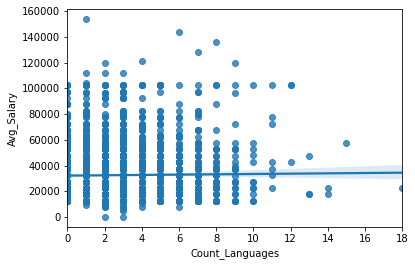

In [16]:
#Regression plot

sns.regplot(x = dfLanguages2['Count_Languages'], y = dfSalary["Avg_Salary"], data = dfSalary)
plt.show()

<AxesSubplot:>

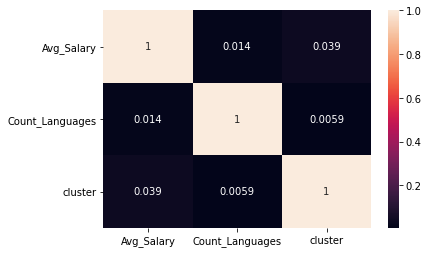

In [17]:
#Correlation testin order to figure out t

corr = dfSalary.corr(method = "pearson")
sns.heatmap(corr, annot = True)

#seria mais interessante um profissional generalista, pela análise de associação, quem quer ganhar mais, deve aprender C# e SQL

#### Main results of K-Means Clustering

 
K-Means clustering for this project shows that we are not able to set clusters considering number of languages a person knows and their salary. It were also confirmed with linear regression and Pearson's correlation test, presented this last 2 visuals. Although both number of languages and Salary are not related in this sample, let's analyse if this pattern occours in the top 3 languages with the highest salary: Go, Perl and Kotlin.

**Conclusion: In general, there is no correlation between the number of languages that a worker knows with their salary. We can extend this result, and conclude that specialists tend to earn more.**


In [18]:
#Filtering data: Go language

dfLanguageGo = dataframe.iloc[:,:36]

mask = dfLanguageGo['Language_Go'] == 'Go'
dfLanguageGo = dfLanguageGo[mask]
dfLanguageGoCounted = dfLanguageGo.iloc[:,1:]
dfLanguageGoCounted['Count_Languages'] = dfLanguageGo.count(axis='columns')
dfLanguageGoCounted['Avg_Salary'] = dfLanguageGo['Avg_Salary']
dfLanguageGoCounted.head()

,Language_JavaScript,Language_Bash/Shell/PowerShell,Language_SQL,Language_Java,Language_C#,Language_Python,Language_PHP,Language_C++,Language_C,Language_TypeScript,...,Language_Kotlin,Language_Rust,Language_Elixir,Language_Clojure,Language_WebAssembly,Language_Dart,Language_Languages_N/A,Language_Languages_Other,Count_Languages,Avg_Salary
92,NaN,Bash/Shell/PowerShell,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Clojure,NaN,NaN,NaN,NaN,5,52500
143,JavaScript,Bash/Shell/PowerShell,SQL,NaN,NaN,NaN,PHP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,22500
154,JavaScript,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,TypeScript,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,32500
159,JavaScript,NaN,NaN,NaN,NaN,NaN,PHP,NaN,NaN,TypeScript,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,32500
166,JavaScript,Bash/Shell/PowerShell,SQL,Java,C#,Python,PHP,NaN,NaN,TypeScript,...,Kotlin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,72500


<AxesSubplot:>

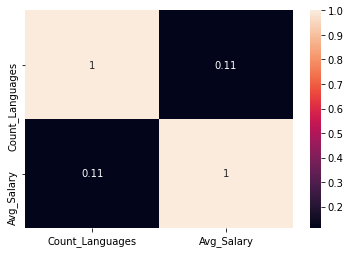

In [19]:
#Correlation test: is there correlation between number of languages and salary among people who know Go? 

categories = ['Count_Languages', 'Avg_Salary']
dfCorrLanguageGo = dfLanguageGoCounted[categories]

corr = dfCorrLanguageGo.corr(method = "pearson")
sns.heatmap(corr, annot = True)

Text(0.5, 1.0, 'Number of Languages x Salary - Go')

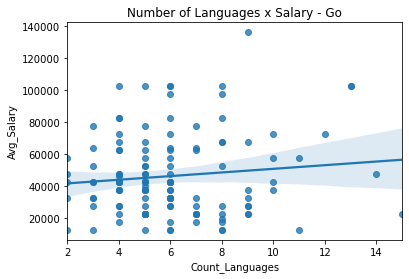

In [20]:
#Plotting Number of Languages x Salary

sns.regplot(x = dfCorrLanguageGo['Count_Languages'], 
            y = dfCorrLanguageGo['Avg_Salary']).set_title('Number of Languages x Salary - Go')

In [21]:
#Filtering data: Perl language

dfLanguagePerl = dataframe.iloc[:,:36]

mask = dfLanguagePerl['Language_Perl'] == 'Perl'
dfLanguagePerl = dfLanguagePerl[mask]
dfLanguagePerlCounted = dfLanguagePerl.iloc[:,1:]
dfLanguagePerlCounted['Count_Languages'] = dfLanguagePerl.count(axis='columns')
dfLanguagePerlCounted['Avg_Salary'] = dfLanguagePerl['Avg_Salary']
dfLanguagePerlCounted.head()

,Language_JavaScript,Language_Bash/Shell/PowerShell,Language_SQL,Language_Java,Language_C#,Language_Python,Language_PHP,Language_C++,Language_C,Language_TypeScript,...,Language_Kotlin,Language_Rust,Language_Elixir,Language_Clojure,Language_WebAssembly,Language_Dart,Language_Languages_N/A,Language_Languages_Other,Count_Languages,Avg_Salary
235,JavaScript,Bash/Shell/PowerShell,SQL,NaN,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,97500
242,NaN,Bash/Shell/PowerShell,SQL,Java,C#,Python,NaN,NaN,NaN,NaN,...,Kotlin,Rust,Elixir,NaN,NaN,NaN,NaN,NaN,14,47500
443,JavaScript,NaN,SQL,NaN,NaN,NaN,PHP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,17500
707,NaN,Bash/Shell/PowerShell,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,47500
872,NaN,Bash/Shell/PowerShell,SQL,Java,NaN,Python,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,32500


<AxesSubplot:>

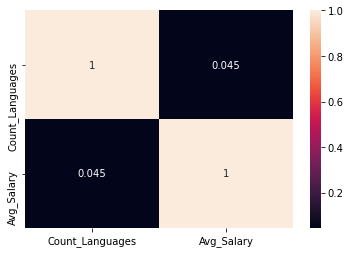

In [22]:
#Correlation test: is there correlation between number of languages and salary among people who know Perl? 

categories = ['Count_Languages', 'Avg_Salary']
dfCorrLanguagePerl = dfLanguagePerlCounted[categories]

corr = dfCorrLanguagePerl.corr(method = "pearson")
sns.heatmap(corr, annot = True)

Text(0.5, 1.0, 'Number of Languages x Salary - Perl')

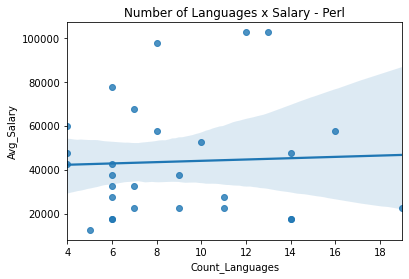

In [23]:
#Plotting Number of Languages x Salary

sns.regplot(x = dfCorrLanguagePerl['Count_Languages'], 
            y = dfCorrLanguagePerl['Avg_Salary']).set_title('Number of Languages x Salary - Perl')

In [24]:
#Filtering data: Kotlin language

dfLanguageKotlin = dataframe.iloc[:,:36]

mask = dfLanguageKotlin['Language_Kotlin'] == 'Kotlin'
dfLanguageKotlin = dfLanguageKotlin[mask]
dfLanguageKotlinCounted = dfLanguageKotlin.iloc[:,1:]
dfLanguageKotlinCounted['Count_Languages'] = dfLanguageKotlin.count(axis='columns')
dfLanguageKotlinCounted['Avg_Salary'] = dfLanguageKotlin['Avg_Salary']
dfLanguageKotlinCounted

,Language_JavaScript,Language_Bash/Shell/PowerShell,Language_SQL,Language_Java,Language_C#,Language_Python,Language_PHP,Language_C++,Language_C,Language_TypeScript,...,Language_Kotlin,Language_Rust,Language_Elixir,Language_Clojure,Language_WebAssembly,Language_Dart,Language_Languages_N/A,Language_Languages_Other,Count_Languages,Avg_Salary
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kotlin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,42500
88,NaN,Bash/Shell/PowerShell,SQL,Java,C#,NaN,NaN,NaN,NaN,NaN,...,Kotlin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,42500
161,JavaScript,Bash/Shell/PowerShell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TypeScript,...,Kotlin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,47500
166,JavaScript,Bash/Shell/PowerShell,SQL,Java,C#,Python,PHP,NaN,NaN,TypeScript,...,Kotlin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,72500
185,JavaScript,Bash/Shell/PowerShell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kotlin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,42500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TypeScript,...,Kotlin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,42500
3334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kotlin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,17500
3338,JavaScript,Bash/Shell/PowerShell,NaN,Java,NaN,Python,NaN,NaN,NaN,TypeScript,...,Kotlin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,42500
3353,NaN,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,...,Kotlin,NaN,NaN,NaN,NaN,Dart,NaN,NaN,5,47500


<AxesSubplot:>

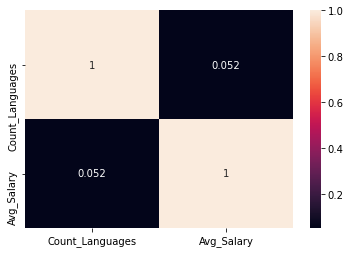

In [25]:
#Correlation test: is there correlation between number of languages and salary among people who know Kotlin? 

categories = ['Count_Languages', 'Avg_Salary']
dfCorrLanguageKotlin = dfLanguageKotlinCounted[categories]

corr = dfCorrLanguageKotlin.corr(method = "pearson")
sns.heatmap(corr, annot = True)

Text(0.5, 1.0, 'Number of Languages x Salary - Kotlin')

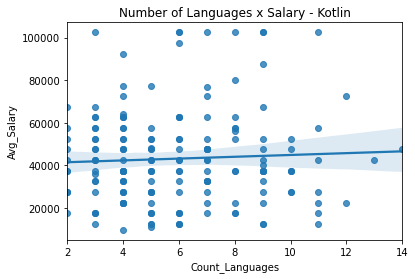

In [26]:
#Plotting Number of Languages x Salary

sns.regplot(x = dfCorrLanguageKotlin['Count_Languages'], 
            y = dfCorrLanguageKotlin['Avg_Salary']).set_title('Number of Languages x Salary - Kotlin')

#### Main results of correlation between number of languages and salary
 
The main result of the latest analysis is that there is a correlation between number of languages a worker who knows Go and their salary. It does not occurs for the other 2 ones: Perl and Kotlin. Knowing that, in the next session we are going to analyze the profile of this professional: what languages someone who knows Go, also have learned?


**Conclusion: As a matter of fact, Go developers earn higher salaries and they also have background in multiple programming languages. Considering that they are majority > 9years of experience and Go is a recent programming language, this workers must have adopted Go additionally.**

# Machine Learning

### Association rules 

In this session, we are going to apply Association Rules Apriori algorithm in order to figure out what language are learned together by the Tech workers. For definition, antecedent is an item found within the data and a consequent is an item found in combination with the antecedent. Association rules are created by searching data for frequent if-then patterns and using the criteria support and confidence to identify the most important relationships.

<img src="https://www.solodev.com/core/fileparse.php/131/urlt/programming-languages-solodev_final.jpg" width="500">


In [27]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [28]:
#Filltering the Go workers and pre-processing

dfLanguageGoAssociation = dfLanguageGo.iloc[:,1:]
dfLanguageGoAssociation.head()

dfLanguageGoAssociation = dfLanguageGoAssociation.fillna(0)
listOfLanguagesGo = dfLanguageGoAssociation.values.tolist()
listOfLanguagesGo = list(map(
    lambda languages: list(filter(lambda language: language != 0, languages)), 
    listOfLanguagesGo))

listOfLanguagesGo[0:5]

[['Bash/Shell/PowerShell', 'SQL', 'Go', 'Clojure'],
 ['JavaScript', 'Bash/Shell/PowerShell', 'SQL', 'PHP', 'Go', 'HTML/CSS'],
 ['JavaScript', 'Java', 'TypeScript', 'Swift', 'Go'],
 ['JavaScript', 'PHP', 'TypeScript', 'Go', 'HTML/CSS'],
 ['JavaScript',
  'Bash/Shell/PowerShell',
  'SQL',
  'Java',
  'C#',
  'Python',
  'PHP',
  'TypeScript',
  'Go',
  'HTML/CSS',
  'Kotlin']]

In [29]:
#One hot encoding

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
teArray = te.fit(listOfLanguagesGo).transform(listOfLanguagesGo)
teDataframe = pd.DataFrame(teArray, columns=te.columns_)

teDataframe.head()

,Bash/Shell/PowerShell,C,C#,C++,Clojure,Coffee Script,Dart,Delphi,Elixir,Go,...,Ruby,Rust,SQL,Scala,Swift,TypeScript,VB.NET,VBA,Visual Basic 6,WebAssembly
0,True,False,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,True,False,True,False,False,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False


In [30]:
#Applying Apriori algorithm

from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(teDataframe, min_support = 0.2, use_colnames = True) 
frequent_itemsets.sort_values(by=['support'], ascending = True).head(10)

,support,itemsets
29,0.209302,"(JavaScript, Python, Go)"
21,0.209302,"(JavaScript, Python)"
3,0.240310,(Java)
26,0.240310,"(Python, Go, Bash/Shell/PowerShell)"
14,0.240310,"(Java, Go)"
11,0.240310,"(Python, Bash/Shell/PowerShell)"
16,0.248062,"(Go, PHP)"
28,0.248062,"(JavaScript, Go, HTML/CSS)"
24,0.248062,"(Python, SQL)"
20,0.248062,"(JavaScript, HTML/CSS)"


In [31]:
#Creating the association rules

from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
#rules
rules.sort_values(by=['lift'], ascending = False).drop(
    ['antecedent support', 'consequent support', 'leverage', 'conviction'], axis=1).head()


,antecedents,consequents,support,confidence,lift
28,"(Go, SQL)",(Bash/Shell/PowerShell),0.27907,0.610169,1.457627
4,(SQL),(Bash/Shell/PowerShell),0.27907,0.610169,1.457627
31,(SQL),"(Go, Bash/Shell/PowerShell)",0.27907,0.610169,1.457627
5,(Bash/Shell/PowerShell),(SQL),0.27907,0.666667,1.457627
30,"(Go, Bash/Shell/PowerShell)",(SQL),0.27907,0.666667,1.457627


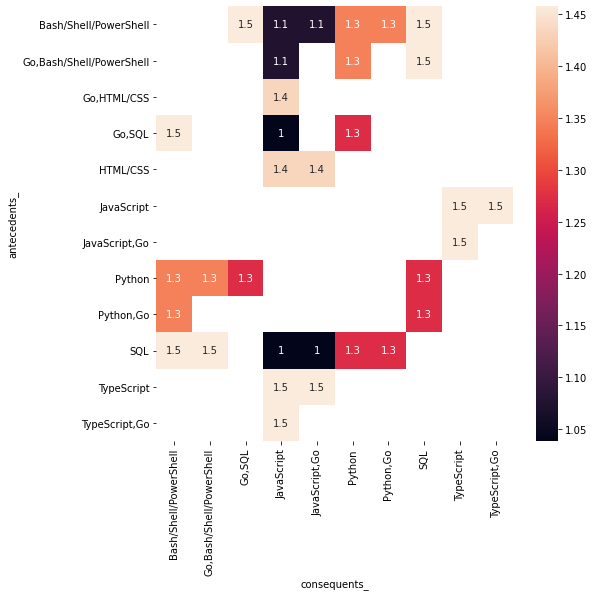

In [32]:
#Plotting the associating rules
#Lift > 1 means that there is a significative association#### Main results of Association Rules

import seaborn as sns
# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lift']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(pivot, annot = True, ax = ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

#### Main results of Association Rules: Language Go x Other Languages

As a result, we can conclude that Go is learned with Bash/Shell/PowerShell, HTML/CSS, Javascript, Python and SQL both in pair combination both as antecedent or consequent.

**Conclusion: Developers who have background in Bash/Shell/PowerShell, HTML/CSS, Javascript, Python and SQL are potencial candidate to adopt Go as well. In addicion, new learners who want to be a Go developers, might consider learn some of this other languages too.**

In [33]:
#Importing the dataset

dataframe = pd.read_excel("Languages.xlsx") 
dfLanguage = dataframe.iloc[:,1:36]
dfLanguage.head()

,Language_JavaScript,Language_Bash/Shell/PowerShell,Language_SQL,Language_Java,Language_C#,Language_Python,Language_PHP,Language_C++,Language_C,Language_TypeScript,...,Language_Haskell,Language_HTML/CSS,Language_Kotlin,Language_Rust,Language_Elixir,Language_Clojure,Language_WebAssembly,Language_Dart,Language_Languages_N/A,Language_Languages_Other
0,NaN,NaN,SQL,Java,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JavaScript,NaN,SQL,NaN,NaN,NaN,PHP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JavaScript,NaN,SQL,Java,NaN,NaN,PHP,C++,NaN,NaN,...,NaN,HTML/CSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,C++,NaN,TypeScript,...,NaN,HTML/CSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JavaScript,NaN,SQL,Java,C#,NaN,NaN,C++,NaN,TypeScript,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dart,NaN,NaN


In [34]:
#Transforming dataframe into a list and cleaning missing data (pre-processing)

dfLanguage = dfLanguage.fillna(0)
listOfLanguages = dfLanguage.values.tolist()
listOfLanguages = list(map(
    lambda languages: list(filter(lambda language: language != 0, languages)), 
    listOfLanguages))

listOfLanguages[0:5]

[['SQL', 'Java', 'VBA'],
 ['JavaScript', 'SQL', 'PHP'],
 ['JavaScript', 'SQL', 'Java', 'PHP', 'C++', 'Swift', 'HTML/CSS'],
 ['JavaScript', 'C++', 'TypeScript', 'HTML/CSS'],
 ['JavaScript',
  'SQL',
  'Java',
  'C#',
  'C++',
  'TypeScript',
  'VB.NET',
  'Visual Basic 6',
  'Dart']]

In [35]:
#One hot encoding

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
teArray = te.fit(listOfLanguages).transform(listOfLanguages)
teDataframe = pd.DataFrame(teArray, columns=te.columns_)

teDataframe.head()

,.Net Core,AL,APEX,ASP.NET,Abap,Angular,Ansible,Apex,Apex - Salesforce,Apex / Lightning (Salesforce),...,Vuejs,WebAssembly,Windev,Windows,XML-based,cobol,fox,none,outsystems,yaml
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
#Appling the Apriori algorithm

from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(teDataframe, min_support = 0.1, use_colnames = True) 
frequent_itemsets.sort_values(by=['support'], ascending = True).head(10)

,support,itemsets
24,0.100267,"(C#, JavaScript, SQL)"
22,0.102344,"(SQL, PHP)"
23,0.102640,"(Python, SQL)"
11,0.109463,"(C#, HTML/CSS)"
9,0.110056,"(JavaScript, Bash/Shell/PowerShell)"
26,0.115693,"(TypeScript, JavaScript, HTML/CSS)"
19,0.118659,"(JavaScript, PHP)"
16,0.127855,"(TypeScript, HTML/CSS)"
12,0.128152,"(C#, JavaScript)"
10,0.128449,"(SQL, Bash/Shell/PowerShell)"


In [37]:
#Creating the association rules

from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
#rules
rules.sort_values(by=['lift'], ascending = False).drop(['antecedent support', 'consequent support', 'leverage', 'conviction'], axis=1).head()


,antecedents,consequents,support,confidence,lift
18,"(JavaScript, SQL)",(HTML/CSS),0.194008,0.679128,1.892016
21,(HTML/CSS),"(JavaScript, SQL)",0.194008,0.540496,1.892016
22,"(TypeScript, JavaScript)",(HTML/CSS),0.115693,0.659898,1.838444
24,(TypeScript),"(JavaScript, HTML/CSS)",0.115693,0.557940,1.803275
23,"(TypeScript, HTML/CSS)",(JavaScript),0.115693,0.904872,1.773445


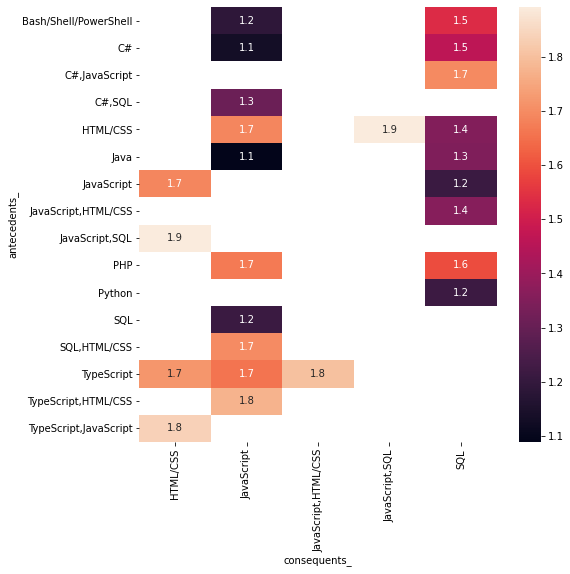

In [38]:
#Plotting the associating rules
#Lift > 1 means that there is a significative association

import seaborn as sns
# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lift']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(pivot, annot = True, ax = ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

#### Main results of Association Rules

The Apriori algorithm that we have applied shows typicals tech stacks of developers that work on projects. From that, we are able to recognize the different roles you can found in the top job roles. Considering (antecedent) + (consequent):

1. The tech stack (Javascript, HTML/CSS) + (SQL), (SQL, C#) + (Javascript), (Javascript) + (Java), (PHP) + (Javascript) and (Javascript, C#) + (SQL) are technologies that typically belong to **Full-Stack Developer** role.


2. The tech stack (Java) + (SQL) and (C#) + (SQL) are technologies that belong to **Back-End Developer** role.


3. The tech stack (Javascript) + (HTML/CSS), (Typescript, HTML/CSS) + (Javascript) and (Typescript, Javascript) + (HTML/CSS) are technologies that typically belong to **Front-End Developer** role.


4. The tech stack (Python) + (SQL) are technologies that typically belong to **Data Scientist/Data Engineer** role.


5. Finally, the tech stack (Bash/Shell/PowerShell) + (SQL) are technologies that typically belong to **DevOps Engineer** and **Maintenace & Support** roles.


**Conclusion: 1. Typicals tech stacks of developers were founded. 2. Javascript is the most popular language and typically related to Front-End and Full-Stack developers, being learned with more sort of languages.**